<a href="https://colab.research.google.com/github/taylan-sen/CIS490b_computer_vision/blob/main/MIDTERM_coding_portion_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIDTERM REVIEW

Follow along adding code and answering questions as explained in the cells below.

### OpenCV basics

In the cell below add code that will download (HINT: get) the image at the following location:

https://upload.wikimedia.org/wikipedia/commons/7/7f/Taylor_Swift_(6966830273).jpg

In the cell below add code to:
* load the image into a numpy ndarray,
* convert the color space from BGR to RGB
* add a 50x50 solid red square in about the middle of the image
* cut the image brightness in half
* plot the image

### Neural networks

Run the code cell below.

QUESTION: What is the purpose of splitting the data into a training and test set?  
QUESTION: What are tensorflow and keras?  

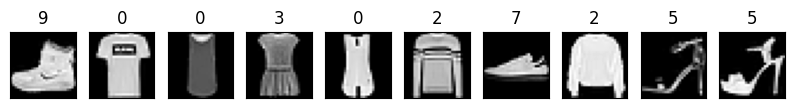

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist

# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()




Add code in the cell below that will print out the shape of the input and output of the training and test sets.

QUESTION: How many samples are in the training and test sets?  
QUESTION: What are the input and output dimensions?  


Add code in the cell below that will print out the output values of the first 10 training set samples.  

QUESTION: How many different output classes are there?  

Add code in the cell below that draws (plots) the first 10 images of the training set.

In each of the lines of code in the cell below, add a comment describing what the line is doing.

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 20)                15700     
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 15910 (62.15 KB)
Trainable params: 15910 (62.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Run the cell below and the answer the following questions.

In [12]:
# Train the neural network model

model.compile(loss='sparse_categorical_crossentropy',
	      optimizer='adam',
	      metrics=['acc'])

# Train the Neural Network model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7254 - acc: 0.7231 - val_loss: 0.7429 - val_acc: 0.7199
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7152 - acc: 0.7296 - val_loss: 0.7789 - val_acc: 0.6979
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7321 - acc: 0.7200 - val_loss: 0.7914 - val_acc: 0.6925
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7413 - acc: 0.7161 - val_loss: 0.7754 - val_acc: 0.7393
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7255 - acc: 0.7391 - val_loss: 0.7203 - val_acc: 0.7382


QUESTION: How is the performance of the model after training?  
QUESTION: What are three ways can it be improved?  

Run the code below to predict the outputs for the test set.  
QUESTION: What is the shape of the predictions?  Why?

In [14]:
# Making predictions using our trained model
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
best_predictions = np.argmax(predictions, axis=1)

Run the cell above. Look at the shape of best_predictions. Use google to figure out what it is doing.

QUESTION: In your own words, describe what the code in the above cell is doing.  

313/313 [==============================] - 1s 2ms/step


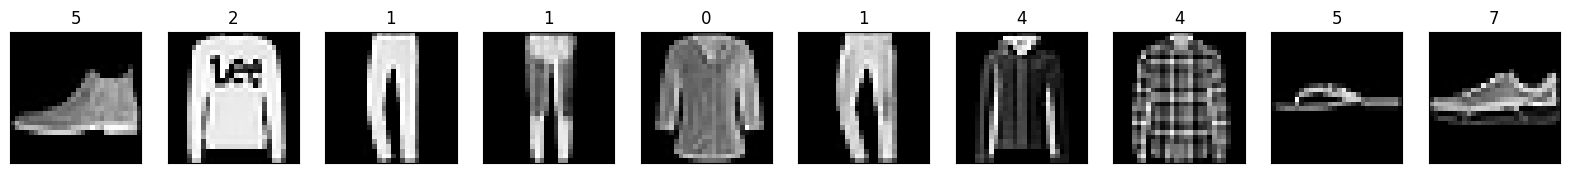

In [13]:

# Display some predictions on test data
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(best_predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()